In [1]:
import numpy as np
from matplotlib import pyplot as plt
# Core configuration & plotting settings
from qspectro2d.config import *  # provides CONFIG and mpl settings
from qspectro2d.core.atomic_system.system_class import AtomicSystem

from qspectro2d.config.paths import FIGURES_TESTS_DIR
name_plot_folder = "test_N_atoms_geometry"
custom_dir = FIGURES_TESTS_DIR / name_plot_folder

from plotstyle import COLORS, MARKERS, LINE_STYLES, FONT_SIZE, LATEX_DOC_WIDTH, set_size, save_fig, latex_available, format_sci_notation, init_style
init_style()

### Helper printing utilities
def show_basic_info(title: str, system):
    print(f"\n=== {title} ===")
    print(f"n_atoms: {system.n_atoms}")
    print("frequencies (cm^-1):", system.at_freqs_cm)
    print("dip moments:", system.dip_moments)
    if system.n_atoms <= 12:
        print("Hamiltonian matrix (fs^-1 units / ħ incorporated):")
        print(system.H0_N_canonical.tidyup().full().real)
    print("Eigenvalues (fs^-1):", system.eigenstates[0])

In [2]:
### 1. Single atom system
single = AtomicSystem(n_atoms=1, at_freqs_cm=[16000.0], dip_moments=[1.0])
show_basic_info("Single Atom", single)


=== Single Atom ===
n_atoms: 1
frequencies (cm^-1): [16000.0]
dip moments: [1.0]
Hamiltonian matrix (fs^-1 units / ħ incorporated):
[[0.         0.        ]
 [0.         3.01391833]]
Eigenvalues (fs^-1): [0.         3.01391833]


In [3]:
### 2. Dimer with coupling
# Simple two-site system with modest detuning and coupling
dimer1 = AtomicSystem(
    n_atoms=2,
    max_excitation=1,  # single-excitation manifold
    at_freqs_cm=[16500.0, 15650.0],
    dip_moments=[1.0, 1.2],
    at_coupling_cm=10.0,)
show_basic_info("Dimer (2 atoms {1})", dimer1)
print("Mixing angle theta (rad):", dimer1.theta)


### 2. Dimer with coupling
# Simple two-site system with modest detuning and coupling
dimer2 = AtomicSystem(
    n_atoms=2,
    max_excitation=2,  # double-excitation manifold
    at_freqs_cm=[16500.0, 15650.0],
    dip_moments=[1.0, 1.112],
    at_coupling_cm=10.0,
)
show_basic_info("Dimer (2 atoms {2})", dimer2)
print("Mixing angle theta (rad):", dimer2.theta)



=== Dimer (2 atoms {1}) ===
n_atoms: 2
frequencies (cm^-1): [16500.0, 15650.0]
dip moments: [1.0, 1.2]
Hamiltonian matrix (fs^-1 units / ħ incorporated):
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.10810328e+00 1.88369896e-03]
 [0.00000000e+00 1.88369896e-03 2.94798886e+00]]
Eigenvalues (fs^-1): [0.         2.94796671 3.10812543]
Mixing angle theta (rad): 0.01176253549260844

=== Dimer (2 atoms {2}) ===
n_atoms: 2
frequencies (cm^-1): [16500.0, 15650.0]
dip moments: [1.0, 1.112]
Hamiltonian matrix (fs^-1 units / ħ incorporated):
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.10810328e+00 1.88369896e-03 0.00000000e+00]
 [0.00000000e+00 1.88369896e-03 2.94798886e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 6.05609214e+00]]
Eigenvalues (fs^-1): [0.         2.94796671 3.10812543 6.05609214]
Mixing angle theta (rad): 0.01176253549260844


In [4]:
### 3 atoms
three_at = AtomicSystem(n_atoms=3,
                        at_freqs_cm=[16000.0, 16500.0, 17000.0],
                        dip_moments=[1.0, 1.0, 1.0],
                        max_excitation=2,  # double-excitation manifold
                        at_coupling_cm=1.0)
show_basic_info("Three Atoms", three_at)


=== Three Atoms ===
n_atoms: 3
frequencies (cm^-1): [16000.0, 16500.0, 17000.0]
dip moments: [1.0, 1.0, 1.0]
Hamiltonian matrix (fs^-1 units / ħ incorporated):
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.01391833e+00 1.88369896e-04 2.35462369e-05
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.88369896e-04 3.10810328e+00 1.88369896e-04
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.35462369e-05 1.88369896e-04 3.20228822e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  6.12202160e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 6.21620655e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 6.31039150e+00]]
Eigenvalues (fs^-1): [0.         3.01391795 3.10810328 3.2022886  6.

In [5]:
### 3. 5-atom system (single-excitation manifold) with dipole-dipole coupling
five_at = AtomicSystem(
    n_atoms=5,
    at_freqs_cm=[16000 + 5*i for i in range(5)],
    dip_moments=[1.0]*5,
    at_coupling_cm=30.0,
    max_excitation=1,
)
show_basic_info("5-Atom Dipole-Dipole Coupling", five_at)

### 4. 12-atom cylindrical geometry (2 chains x 3 rings) with 1/r^3 couplings
cyl1 = AtomicSystem(
    n_atoms=12,
    n_rings=3,  # 3 rings, 2 chains
    at_freqs_cm=[16000.0]*12,
    dip_moments=[1.0]*12,
    at_coupling_cm=20.0,  # used as default prefactor if not specified
)
# Place on cylinder and build couplings
show_basic_info("Cylindrical Geometry (12 atoms)", cyl1)
print("Positions (arbitrary units):\n", cyl1.positions)
print("Coupling matrix (cm^-1):\n", cyl1.coupling_matrix)


=== 5-Atom Dipole-Dipole Coupling ===
n_atoms: 5
frequencies (cm^-1): [16000, 16005, 16010, 16015, 16020]
dip moments: [1.0, 1.0, 1.0, 1.0, 1.0]
Hamiltonian matrix (fs^-1 units / ħ incorporated):
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.01391833e+00 5.65109687e-03 7.06387108e-04
  2.09299884e-04 8.82983885e-05]
 [0.00000000e+00 5.65109687e-03 3.01486018e+00 5.65109687e-03
  7.06387108e-04 2.09299884e-04]
 [0.00000000e+00 7.06387108e-04 5.65109687e-03 3.01580203e+00
  5.65109687e-03 7.06387108e-04]
 [0.00000000e+00 2.09299884e-04 7.06387108e-04 5.65109687e-03
  3.01674388e+00 5.65109687e-03]
 [0.00000000e+00 8.82983885e-05 2.09299884e-04 7.06387108e-04
  5.65109687e-03 3.01768573e+00]]
Eigenvalues (fs^-1): [0.         3.00643591 3.0100149  3.01494195 3.02086193 3.02675544]

=== Cylindrical Geometry (12 atoms) ===
n_atoms: 12
frequencies (cm^-1): [16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000

Text(0.5, 0, 'z')

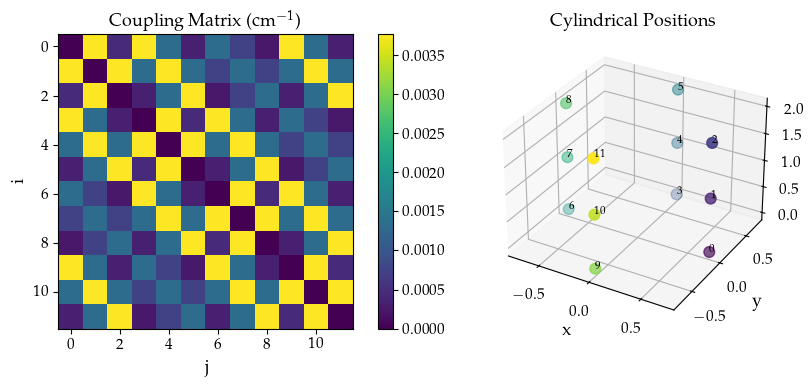

In [6]:
### Visualization: Coupling matrix heatmap & 3D positions
fig = plt.figure(figsize=(12,4))

# Coupling matrix heatmap
ax1 = fig.add_subplot(1,2,1)
mat = cyl1.coupling_matrix
im = ax1.imshow(mat, cmap='viridis')
ax1.set_title("Coupling Matrix (cm$^{-1}$)")
ax1.set_xlabel("j")
ax1.set_ylabel("i")
plt.colorbar(im, ax=ax1, fraction=0.046, pad=0.04)

# 3D positions
ax2 = fig.add_subplot(1,2,2, projection='3d')
pos = cyl1.positions
ax2.scatter(pos[:,0], pos[:,1], pos[:,2], c=np.arange(len(pos)), cmap='viridis', s=60)
for idx, (x,y,z) in enumerate(pos):
    ax2.text(x, y, z, f"{idx}", fontsize=8)
ax2.set_title("Cylindrical Positions")
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
#save_fig(fig, "cylindrical_positions.png")

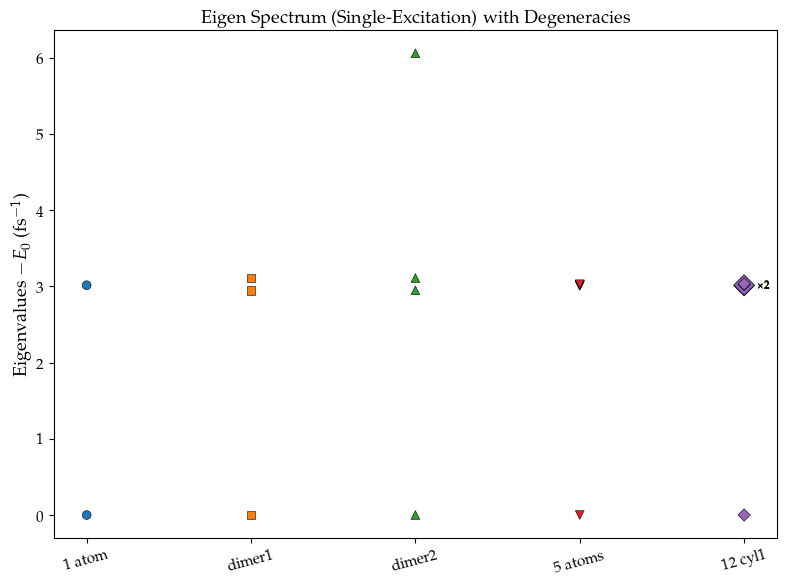

In [7]:
### 5. Energy spectrum comparison plot (eigenvalues with degeneracy)
# Assemble systems in an ordered mapping for automatic iteration
systems_map = {
    "1 atom": single,
    "dimer1": dimer1,
    "dimer2": dimer2,
    "5 atoms": five_at,
    "12 cyl1": cyl1,
}

# Group nearly-equal eigenvalues (degeneracy) helper
def group_levels(evals: np.ndarray, atol: float = 1e-10):
    vals_sorted = np.sort(evals)
    uniq = []
    counts = []
    for e in vals_sorted:
        if not uniq or abs(e - uniq[-1]) > atol:
            uniq.append(e)
            counts.append(1)
        else:
            counts[-1] += 1
    return np.array(uniq), np.array(counts)

plt.figure()
handles = []
for x, (label, sys) in enumerate(systems_map.items()):
    evals = sys.eigenstates[0]
    evals_shift = evals - evals.min()  # shift so ground level = 0
    uniq, counts = group_levels(evals_shift)

    color     = COLORS[x % len(COLORS)]
    marker    = MARKERS[x % len(MARKERS)]

    # Marker size encodes degeneracy
    sizes = 40 + 70*(counts-1)  # base size + additive per extra state
    plt.scatter(
        np.full_like(uniq, x, dtype=float),
        uniq,
        s=sizes,
        color=color,
        marker=marker,
        edgecolors='k',
        linewidths=0.4,
        label=label,
        zorder=3,
    )

    # Annotate degeneracy if >1; small horizontal jitter for readability
    for u, cnt in zip(uniq, counts):
        if cnt > 1:
            plt.text(x + 0.08, u, f"×{cnt}", va='center', ha='left', fontsize=8)

plt.ylabel(r'Eigenvalues $- E_0$ (fs$^{-1}$)')
plt.xticks(range(len(systems_map)), list(systems_map.keys()), rotation=15)
plt.title('Eigen Spectrum (Single-Excitation) with Degeneracies')
plt.grid(False)
plt.legend(handles=handles, frameon=False, ncol=len(systems_map))


=== Cylindrical Geometry (30 atoms) ===
n_atoms: 30
frequencies (cm^-1): [16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0]
dip moments: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Eigenvalues (fs^-1): [0.         3.00493765 3.00493765 3.00593819 3.00593819 3.00742988
 3.00742988 3.00852222 3.00852222 3.00915801 3.00915801 3.01019738
 3.01019738 3.01079277 3.01079277 3.01142578 3.01197673 3.01197673
 3.01280165 3.01280165 3.01401893 3.01601779 3.01601779 3.01833143
 3.01932942 3.01932942 3.02197767 3.02197767 3.02431979 3.03170515
 3.03959   ]
Positions (arbitrary units):
 [[ 0.85065081  0.          0.        ]
 [ 0.85065081  0.          1.        ]
 [ 0.85065081 

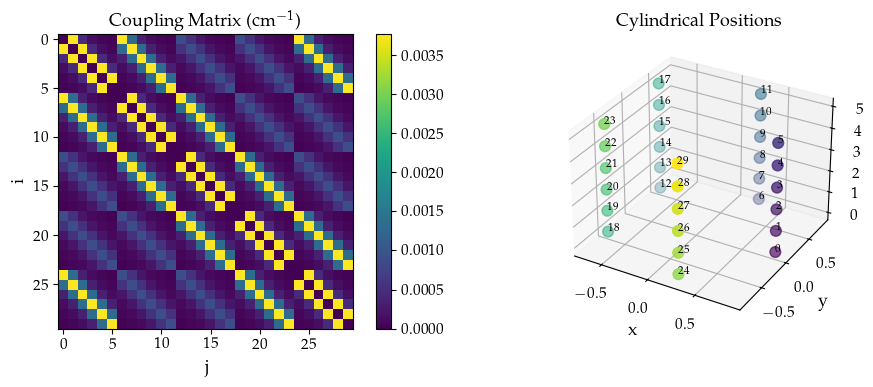

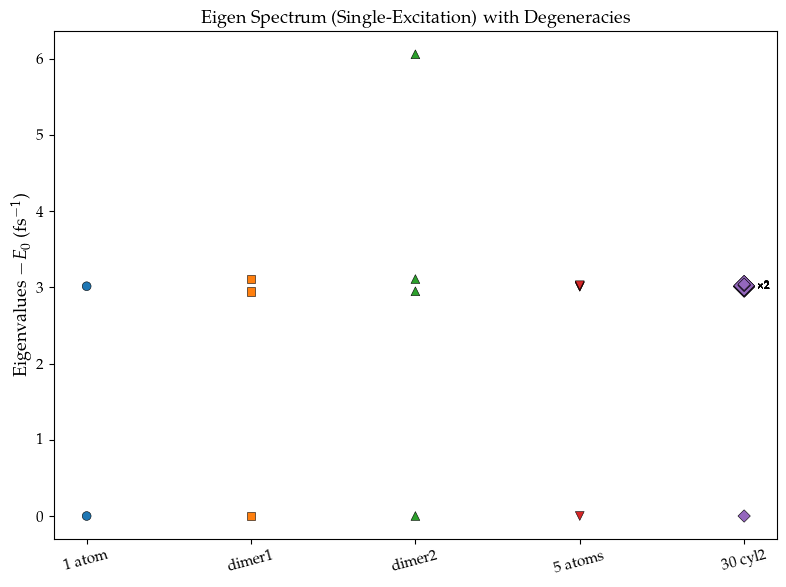

In [8]:
### 4. 12-atom cylindrical geometry (2 chains x 3 rings) with 1/r^3 couplings
cyl2 = AtomicSystem(
    n_atoms=30,
    n_rings=6,  # 6 rings, 2 chains
    at_freqs_cm=[16000.0]*30,
    dip_moments=[1.0]*30,
    max_excitation=1,
    at_coupling_cm=20.0,  # used as default prefactor if not specified
)
# Place on cylinder and build couplings
show_basic_info("Cylindrical Geometry (30 atoms)", cyl2)
print("Positions (arbitrary units):\n", cyl2.positions)
print("Coupling matrix (cm^-1):\n", cyl2.coupling_matrix)

### Visualization: Coupling matrix heatmap & 3D positions
fig = plt.figure(figsize=(12,4))

# Coupling matrix heatmap
ax1 = fig.add_subplot(1,2,1)
mat = cyl2.coupling_matrix
im = ax1.imshow(mat, cmap='viridis')
ax1.set_title("Coupling Matrix (cm$^{-1}$)")
ax1.set_xlabel("j")
ax1.set_ylabel("i")
plt.colorbar(im, ax=ax1, fraction=0.046, pad=0.04)

# 3D positions
ax2 = fig.add_subplot(1,2,2, projection='3d')
pos = cyl2.positions
ax2.scatter(pos[:,0], pos[:,1], pos[:,2], c=np.arange(len(pos)), cmap='viridis', s=60)
for idx, (x,y,z) in enumerate(pos):
    ax2.text(x, y, z, f"{idx}", fontsize=8)
ax2.set_title("Cylindrical Positions")
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
plt.tight_layout()
plt.show()

### 5. Energy spectrum comparison plot (eigenvalues with degeneracy)
# =============================
# DEGENERACY-AWARE PLOT (auto-configured: no manual systems/labels/colors lists)
# =============================
# Assemble systems in an ordered mapping for automatic iteration
systems_map = {
    "1 atom": single,
    "dimer1": dimer1,
    "dimer2": dimer2,
    "5 atoms": five_at,
    "30 cyl2": cyl2,
}

# Group nearly-equal eigenvalues (degeneracy) helper
def group_levels(evals: np.ndarray, atol: float = 1e-10):
    vals_sorted = np.sort(evals)
    uniq = []
    counts = []
    for e in vals_sorted:
        if not uniq or abs(e - uniq[-1]) > atol:
            uniq.append(e)
            counts.append(1)
        else:
            counts[-1] += 1
    return np.array(uniq), np.array(counts)

plt.figure()

handles = []
for x, (label, sys) in enumerate(systems_map.items()):
    evals = sys.eigenstates[0]
    evals_shift = evals - evals.min()  # shift so ground level = 0
    uniq, counts = group_levels(evals_shift)

    color     = COLORS[x % len(COLORS)]
    marker    = MARKERS[x % len(MARKERS)]

    # Marker size encodes degeneracy
    sizes = 40 + 70*(counts-1)  # base size + additive per extra state
    plt.scatter(
        np.full_like(uniq, x, dtype=float),
        uniq,
        s=sizes,
        color=color,
        marker=marker,
        edgecolors='k',
        linewidths=0.4,
        label=label,
        zorder=3,
    )

    # Annotate degeneracy if >1; small horizontal jitter for readability
    for u, cnt in zip(uniq, counts):
        if cnt > 1:
            plt.text(x + 0.08, u, f"×{cnt}", va='center', ha='left', fontsize=8)

plt.ylabel(r'Eigenvalues $- E_0$ (fs$^{-1}$)')
plt.xticks(range(len(systems_map)), list(systems_map.keys()), rotation=15)
plt.title('Eigen Spectrum (Single-Excitation) with Degeneracies')
plt.grid(False)
plt.legend(handles=handles, frameon=False, ncol=len(systems_map))
plt.tight_layout()
plt.show()